In [8]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [9]:
import pandas_datareader
print(pandas_datareader.__version__)

0.8.1


In [50]:
companies_dict = {
'Amazon': 'AMZN',
'Apple': 'AAPL',
'Walgreen': 'WBA',
'Northrop Grumman': 'NOC',
'Boeing': 'BA',
'Lockheed Martin': 'LMT',
'McDonalds': 'MCD',
'Intel': 'INTC',
'Navistar': 'NAV',  
'IBM': 'IBM',
'Texas Instruments': 'TXN',
'MasterCard': 'MA',
'Microsoft': 'MSFT',
'General Electrics': 'GE',
'Symantec': 'SYMC',
'American Express': 'AXP',
'Pepsi': 'PEP',
'Coca Cola': 'KO',
'Johnson & Johnson': 'JNJ',
'Toyota': 'TM',
'Honda': 'HMC',
'Mitsubishi': 'MSBHY',
'Sony': 'SNE',
'Exxon': 'XOM',
'Chevron': 'CVX',
'Valero Energy': 'VLO',
'Ford': 'F',
'Bank of America': 'BAC'
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])
#print(companies)

data_source = 'yahoo'

start_date = '2018-01-01'
end_date = '2019-12-31'

panel_data = data.DataReader(list(companies_dict.values()) , data_source, start_date, end_date)



/home/amanmehta/anaconda3/lib/python3.7/site-packages/pandas_datareader/base.py:270: SymbolWarning: Failed to read symbol: 'SYMC', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [80]:
c = [v for k,v in list(panel_data.columns[panel_data.isnull().any()])]
print(c[0])
# panel_data = panel_data.dropna(axis=1,how='all')


stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])
print(stock_open.iloc[0])

SYMC
Symbols
AMZN     1189.010010
AAPL      172.259995
WBA        74.949997
NOC       305.239990
BA        296.839996
LMT       318.540009
MCD       173.220001
INTC       46.849998
NAV        43.630001
IBM       154.250000
TXN       105.570000
MA        151.910004
MSFT       85.949997
GE         17.288462
AXP        98.940002
PEP       118.059998
KO         45.540001
JNJ       139.229996
TM        128.369995
HMC        34.480000
MSBHY      55.639999
SNE        45.790001
XOM        85.029999
CVX       127.580002
VLO        92.800003
F          12.660000
BAC        29.900000
SYMC             NaN
Name: 2018-01-02 00:00:00, dtype: float64
Symbols
AMZN     1172.000000
AAPL      170.160004
WBA        73.279999
NOC       307.350006
BA        295.750000
LMT       322.000000
MCD       173.729996
INTC       46.380001
NAV        42.880001
IBM       154.500000
TXN       105.110001
MA        152.009995
MSFT       86.129997
GE         16.903847
AXP        99.730003
PEP       119.930000
KO         45

In [39]:
# Calculate daily stock movement

# Converting to row major 
stock_close = np.array(stock_close).T
stock_open = np.array(stock_open).T

row, col = stock_close.shape

movements = np.zeros([row, col])

for i in range(0, row):
    movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])


In [42]:
for i in range(0, row):
   print('Company: {}, Change: {}'.format(companies[i][0], sum(movements[i][:])))

Company: Apple, Change: -477.3397216796875
Company: Amazon, Change: 82.93014526367188
Company: American Express, Change: -16.799938201904297
Company: Boeing, Change: -48.53021240234375
Company: Bank of America, Change: 34.69976806640625
Company: Chevron, Change: -64.12973022460938
Company: Ford, Change: -33.480010986328125
Company: General Electrics, Change: 10.289974212646484
Company: Honda, Change: -24.82999038696289
Company: IBM, Change: -27.209800720214844
Company: Intel, Change: 12.929954528808594
Company: Johnson & Johnson, Change: 37.360015869140625
Company: Coca Cola, Change: -11.350082397460938
Company: Lockheed Martin, Change: -7.6819167137146
Company: MasterCard, Change: -4.839958190917969
Company: McDonalds, Change: -12.319892883300781
Company: Mitsubishi, Change: 0.7199974060058594
Company: Microsoft, Change: -17.090065002441406
Company: Navistar, Change: -18.069915771484375
Company: Northrop Grumman, Change: -8.190011978149414
Company: Pepsi, Change: -8.909988403320312
Co

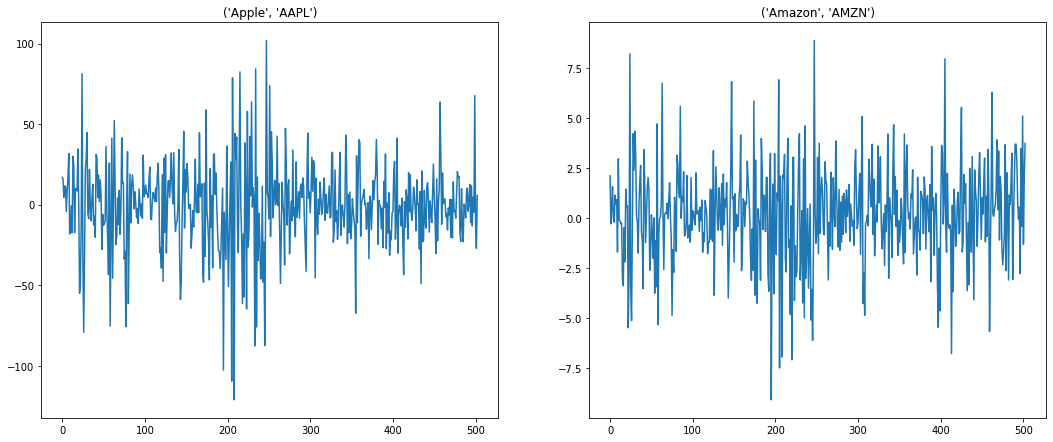

In [43]:
plt.clf
plt.figure(figsize = (18,16))
ax1 = plt.subplot(221)
plt.plot(movements[0][:])
plt.title(companies[0])

plt.subplot(222)
plt.plot(movements[1][:])
plt.title(companies[1])
plt.show()

In [44]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

# Create a normalizer: normalizer
normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.2983574950738525
-0.36477408225905567
-0.0010220713933803758


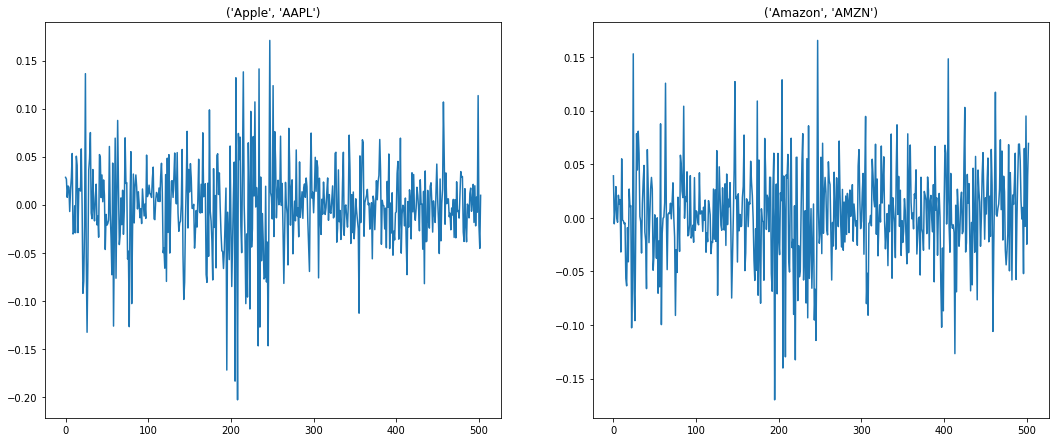

In [45]:
plt.clf
plt.figure(figsize = (18,16))
ax1 = plt.subplot(221)
plt.plot(new[0][:])
plt.title(companies[0])

plt.subplot(222)
plt.plot(new[1][:])
plt.title(companies[1])
plt.show()

In [46]:
# Normalizer for use in pipeline
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10, max_iter=1000)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

print(kmeans.inertia_)

7.297796641199088


In [49]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

print(labels.shape)
print(len(companies))

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

(27,)
28


ValueError: arrays must all be same length

In [ ]:
# Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(new[19][:])
plt.title(companies[19])

plt.subplot(222, sharey=ax1)
plt.plot(new[13][:])
plt.title(companies[13])
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space

reduced_data = PCA(n_components=2).fit_transform(new)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define Colormap
cmap = plt.cm.Paired

plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
